In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("amazon.csv")
df.head()


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [2]:
# Remove commas and ₹, then convert to numbers
df['discounted_price'] = df['discounted_price'].replace('[₹,]', '', regex=True).astype(float)
df['actual_price'] = df['actual_price'].replace('[₹,]', '', regex=True).astype(float)

# Clean and convert rating and rating_count
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = df['rating_count'].replace(',', '', regex=True).astype(float)

# Optional: discount_percentage as number
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '').astype(float)


In [3]:
# Striping signs
df['discounted_price'] = df['discounted_price'].replace('[₹,]', '', regex=True).astype(float)
df['actual_price'] = df['actual_price'].replace('[₹,]', '', regex=True).astype(float)
if df['discount_percentage'].dtype == 'object':
    df['discount_percentage'] = df['discount_percentage'].str.replace('%', '').astype(float)
if df['rating_count'].dtype == 'object':
    df['rating_count'] = df['rating_count'].str.replace(',', '').astype(float).astype(pd.Int64Dtype())

In [4]:
df['category_split'] = df['category'].str.split('|')
max_len = df['category_split'].apply(len).max()
print(f"Maximum number of subcategories: {max_len}")
category_df = pd.DataFrame(df['category_split'].tolist(), columns=[f'category_{i+1}' for i in range(max_len)])
df = pd.concat([df, category_df], axis=1)


df = df.rename(columns={
    'category_1': 'main_category',
    'category_2': 'sub_category_1',
    'category_3': 'sub_category_2',
    'category_4': 'sub_category_3',
    'category_5': 'sub_category_4'
})


Maximum number of subcategories: 7


In [5]:
df[['main_category', 'sub_category_1', 'sub_category_2']].head()


,main_category,sub_category_1,sub_category_2
0,Computers&Accessories,Accessories&Peripherals,Cables&Accessories
1,Computers&Accessories,Accessories&Peripherals,Cables&Accessories
2,Computers&Accessories,Accessories&Peripherals,Cables&Accessories
3,Computers&Accessories,Accessories&Peripherals,Cables&Accessories
4,Computers&Accessories,Accessories&Peripherals,Cables&Accessories


/tmp/ipython-input-6-916606734.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_subcats.values, y=top_subcats.index, palette='rocket')
/tmp/ipython-input-6-916606734.py:8: UserWarning: Glyph 128268 (\N{ELECTRIC PLUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128268 (\N{ELECTRIC PLUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


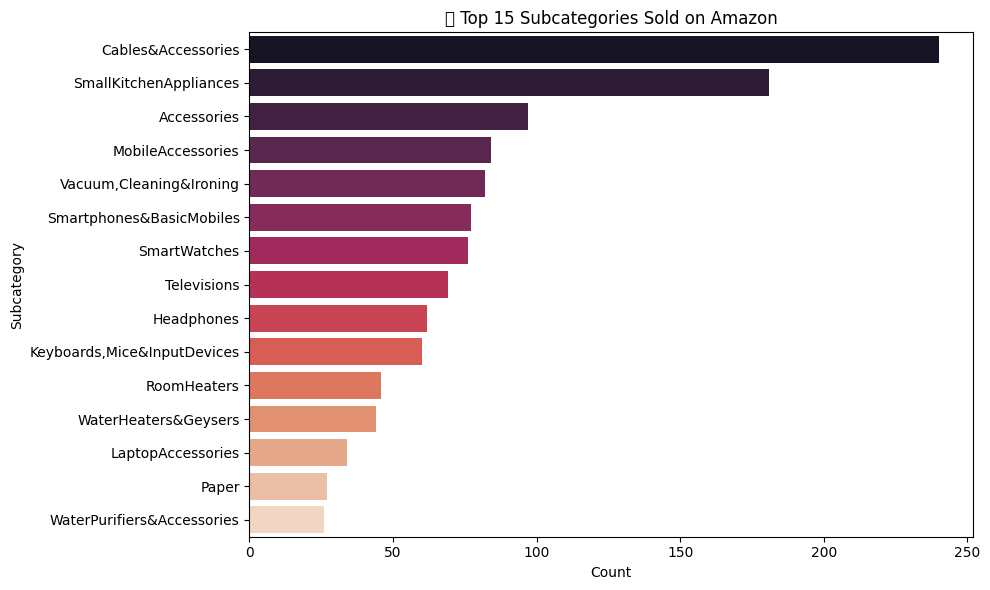

In [6]:
top_subcats = df['sub_category_2'].value_counts().head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_subcats.values, y=top_subcats.index, palette='rocket')
plt.title("🔌 Top 15 Subcategories Sold on Amazon")
plt.xlabel("Count")
plt.ylabel("Subcategory")
plt.tight_layout()
plt.show()


/tmp/ipython-input-7-1483749055.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ratings.values, y=avg_ratings.index, palette='crest')
/tmp/ipython-input-7-1483749055.py:8: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


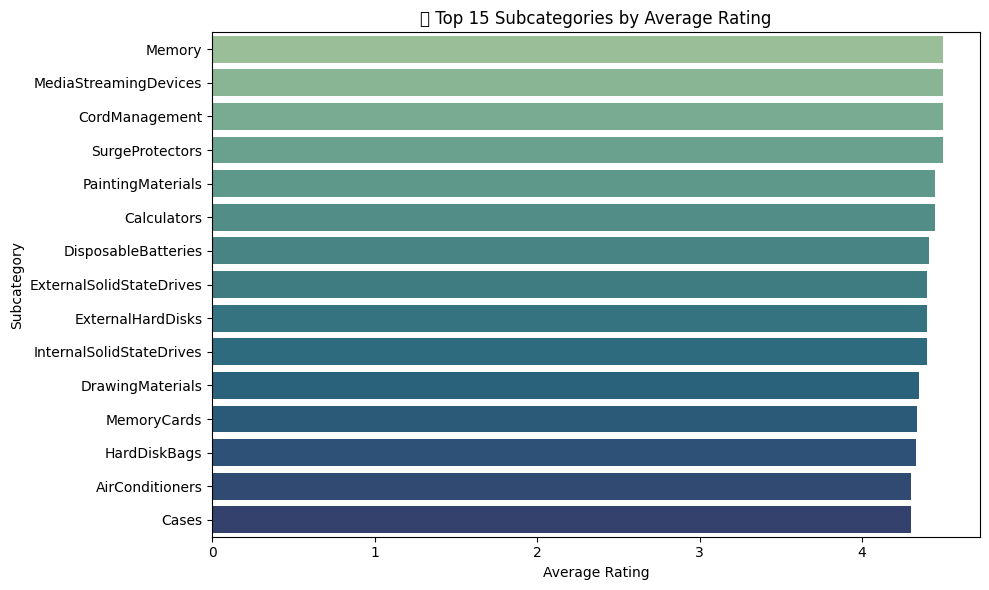

In [7]:
avg_ratings = df.groupby('sub_category_2')['rating'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_ratings.values, y=avg_ratings.index, palette='crest')
plt.title("⭐ Top 15 Subcategories by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Subcategory")
plt.tight_layout()
plt.show()


/tmp/ipython-input-8-1924773354.py:6: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


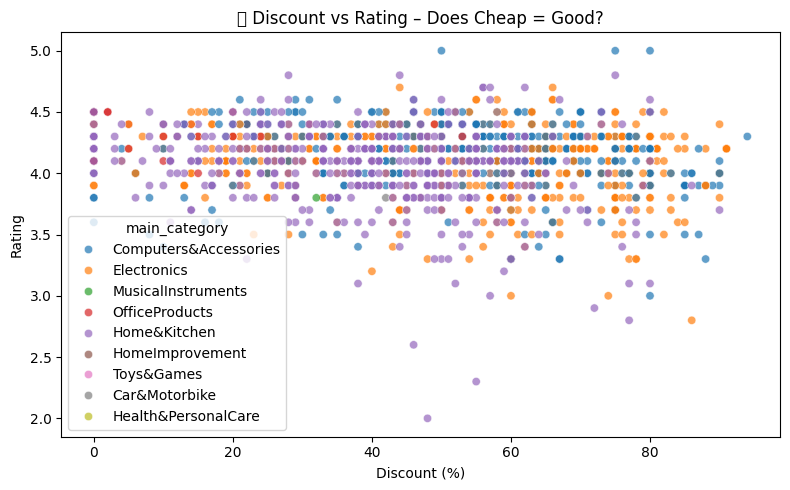

In [8]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='discount_percentage', y='rating', data=df, hue='main_category', alpha=0.7, palette='tab10')
plt.title("🎯 Discount vs Rating – Does Cheap = Good?")
plt.xlabel("Discount (%)")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()


/tmp/ipython-input-9-1586265289.py:6: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


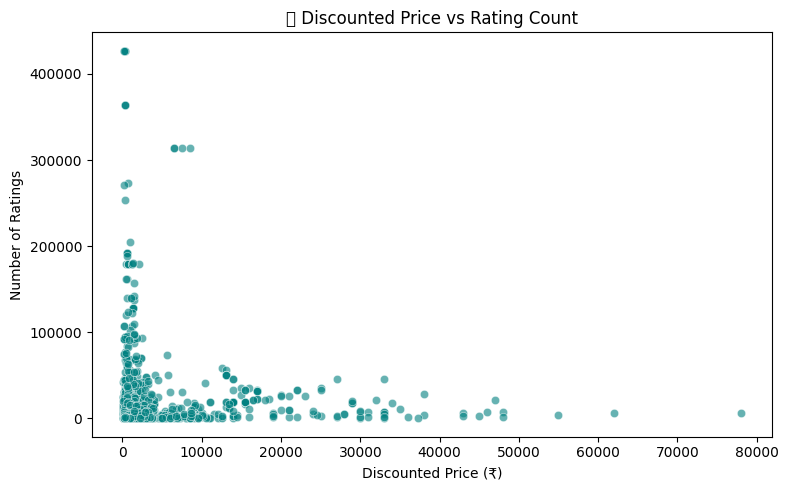

In [9]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='discounted_price', y='rating_count', data=df, alpha=0.6, color='teal')
plt.title("💰 Discounted Price vs Rating Count")
plt.xlabel("Discounted Price (₹)")
plt.ylabel("Number of Ratings")
plt.tight_layout()
plt.show()


In [10]:
top_products = df[['product_name', 'discount_percentage', 'rating', 'rating_count']].sort_values(by='rating_count', ascending=False).head(10)
top_products


,product_name,discount_percentage,rating,rating_count
47,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...",35.0,4.4,426973.0
65,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...",78.0,4.4,426973.0
12,AmazonBasics Flexible Premium HDMI Cable (Blac...,69.0,4.4,426973.0
684,AmazonBasics Flexible Premium HDMI Cable (Blac...,69.0,4.4,426972.0
400,boAt Bassheads 100 in Ear Wired Earphones with...,62.0,4.1,363713.0
352,boAt Bassheads 100 in Ear Wired Earphones with...,65.0,4.1,363713.0
584,boAt BassHeads 100 in-Ear Wired Headphones wit...,63.0,4.1,363711.0
371,"Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...",24.0,4.1,313836.0
370,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...",23.0,4.1,313836.0
566,"Redmi 9A Sport (Coral Green, 3GB RAM, 32GB Sto...",21.0,4.1,313832.0


In [11]:
# Install NLTK
!pip install -q nltk

# Download VADER lexicon
import nltk
nltk.download('vader_lexicon')

# Import and initialize VADER
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Test it
sia.polarity_scores("This cable is super fast and amazing!")  # {'neg': 0.0, 'neu': 0.365, 'pos': 0.635, 'compound': 0.7269}


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


{'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'compound': 0.8398}

In [12]:
# Drop NaNs
df = df.dropna(subset=['review_content'])

# Basic text cleanup
df['clean_review'] = df['review_content'].str.lower().str.replace(r"[^a-zA-Z0-9\s]", '', regex=True)


In [13]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from scipy.special import softmax

# Load model + tokenizer
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

def get_sentiment(text):
    encoded_input = tokenizer(
        text,
        return_tensors="pt",
        truncation=True,
        max_length=512,
        padding="max_length"  # optional, ensures consistent shape
    )
    with torch.no_grad():
        output = model(**encoded_input)
    scores = softmax(output.logits.numpy()[0])
    labels = ['Negative', 'Neutral', 'Positive']
    return labels[scores.argmax()]


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [14]:
sample_df = df.sample(50, random_state=42)
sample_df['sentiment_label'] = sample_df['clean_review'].apply(get_sentiment)


In [15]:
from torch.utils.data import DataLoader

def get_sentiments_batch(texts):
    encoded = tokenizer(
        texts,
        return_tensors="pt",
        truncation=True,
        max_length=512,
        padding=True
    )
    with torch.no_grad():
        outputs = model(**encoded)
    scores = softmax(outputs.logits.numpy(), axis=1)
    labels = ['Negative', 'Neutral', 'Positive']
    return [labels[i] for i in scores.argmax(axis=1)]

# Example on 100 rows
texts = df['clean_review'].dropna().sample(100, random_state=42).tolist()
preds = get_sentiments_batch(texts)



In [16]:
# Extract brand from the first word before space
sample_df['brand'] = sample_df['product_name'].str.extract(r'^([^\s]+)')


/tmp/ipython-input-17-2373296543.py:19: UserWarning: Glyph 128172 (\N{SPEECH BALLOON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128172 (\N{SPEECH BALLOON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


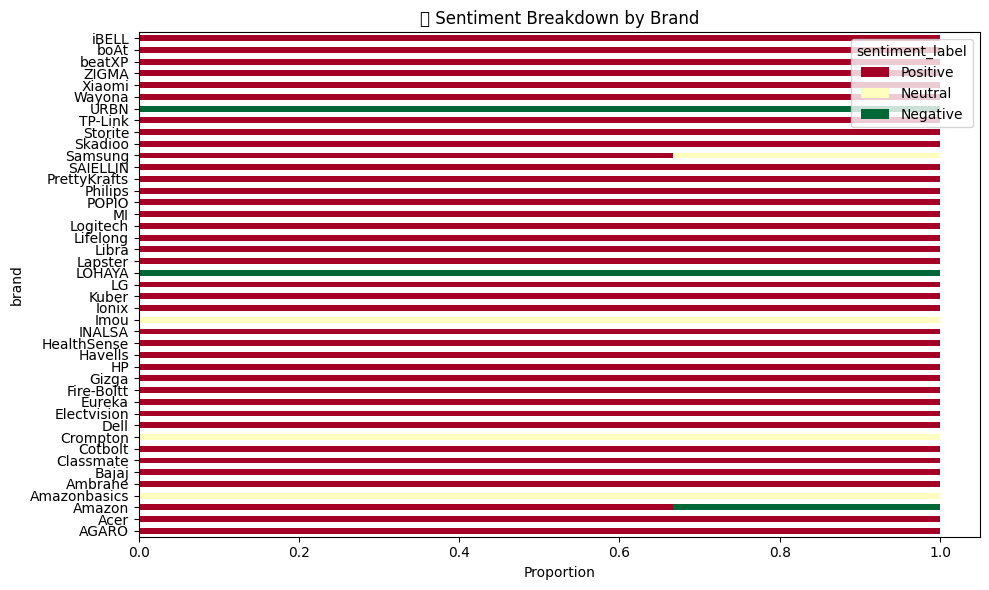

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group and normalize
sentiment_by_brand = (
    sample_df.groupby('brand')['sentiment_label']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
)

# Plot
sentiment_by_brand[['Positive', 'Neutral', 'Negative']].plot(
    kind='barh', stacked=True, figsize=(10, 6), colormap='RdYlGn'
)

plt.title("💬 Sentiment Breakdown by Brand")
plt.xlabel("Proportion")
plt.tight_layout()
plt.show()
